<a href="https://colab.research.google.com/github/Hafsa620/PAI-LAB/blob/main/KNN_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Traditional ML

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('Titanic.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.nunique(axis=0)

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


,count
Survived,
0,549
1,342


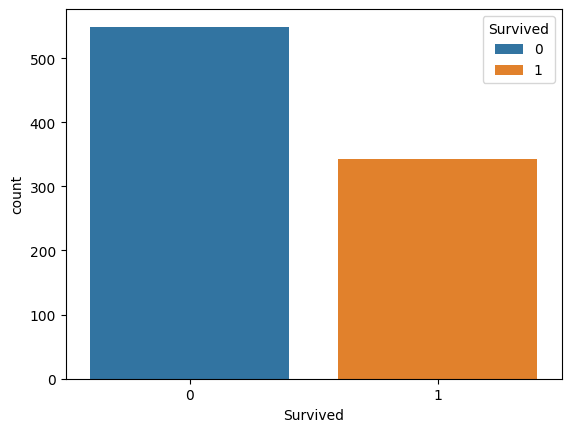

In [ ]:
import seaborn as sns
sns.countplot(df,x='Survived',hue='Survived')
df['Survived'].value_counts()

Imputation

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

<ipython-input-6-1066247f6876>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
<ipython-input-6-1066247f6876>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Convert Categorical features

In [ ]:
df=pd.get_dummies(df,columns=['Sex','Embarked'],dtype=int)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,0,1,1,0,0


Select features

In [ ]:
X=df[['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
y=df[['Survived']]

Splitting

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Model training

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
print(f"Classification_Report:{classification_report(y_test,y_pred)}")
print(f"Accuracy Score:{accuracy_score(y_test,y_pred)}")

Classification_Report:              precision    recall  f1-score   support

           0       0.72      0.83      0.77       105
           1       0.69      0.54      0.61        74

    accuracy                           0.71       179
   macro avg       0.70      0.68      0.69       179
weighted avg       0.71      0.71      0.70       179

Accuracy Score:0.7094972067039106


Pipeline implemantation

In [ ]:
from sklearn.preprocessing import FunctionTransformer,MinMaxScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def impute_embarked(df):
  df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
  return df

def create_family_size(df):
  df['family_size']=df['Parch']+df['SibSp']+1
  return df
def drop_cols(df):
  df.drop(['SibSp','Parch'],axis=1,inplace=True)
  return df

def Family_size(df):
  df=create_family_size(df)
  df=drop_cols(df)
  return df

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,0,1,1,0,0


In [ ]:
##Pipelines
age_pipeline=Pipeline(steps=[('impute_age',SimpleImputer(strategy='mean')), ('scaled_age',MinMaxScaler())])

fare_pipeline=Pipeline(steps=[('scaled_fare',MinMaxScaler())])
embarked_pipeline=Pipeline(steps=[('imputed_embarked',FunctionTransformer(impute_embarked)),
 ('Ohe',OneHotEncoder())])
family_size_pipeline=Pipeline(steps=[('family_size',FunctionTransformer(Family_size)),(
    'Family_szie_Scaler',MinMaxScaler()
)])

##Column Transformer
preprocessing=ColumnTransformer(transformers=[('drop','drop',['PassengerId','Name','Ticket','Cabin']),
                                             ('age_encoder',age_pipeline,['Age']),
                                             ('embarked_encoder',embarked_pipeline,['Embarked']),
                                             ('fare_encoder',fare_pipeline,['Fare']),
                                             ('family_encoder',family_size_pipeline,['SibSp','Parch']),
                                             ('sex_encoder',OneHotEncoder(),['Sex'])
                                             ],remainder='passthrough')
#pipeline
pipeline=Pipeline(steps=[('preprocessing',preprocessing),(
    'classifier',KNeighborsClassifier(n_neighbors=5)
)])

X=df.drop('Survived',axis=1)
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train,y_train)

y_pred=pipeline.predict(X_test)

In [ ]:
print(f"Classification_report:{classification_report(y_pred,y_test)}")

Classification_report:              precision    recall  f1-score   support

           0       0.86      0.81      0.83       111
           1       0.72      0.78      0.75        68

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179



K Fold cross validation
It train and evaluate the model k times using different folds at each time

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(pipeline,X,y,cv=5)  #cv_scores hold list of accuracy scores
print(f"Cross Validation accuracy:{cv_scores}")
print(f"Cross Validation mean accuracy:{cv_scores.mean():.2f}")



Cross Validation accuracy:[0.76536313 0.78089888 0.84269663 0.82022472 0.79213483]
Cross Validation mean accuracy:0.80


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
k=10
cv_scores=cross_val_score(pipeline,X,y,cv=k)  #cv_scores hold list of accuracy scores
#print(f"Cross Validation accuracy:{cv_scores}")

for score in cv_scores:
    print(f"Cross Validation Score: {score:.2f}")
print(f"Cross Validation mean accuracy:{cv_scores.mean():.2f}")



Cross Validation Score: 0.74
Cross Validation Score: 0.81
Cross Validation Score: 0.74
Cross Validation Score: 0.82
Cross Validation Score: 0.88
Cross Validation Score: 0.81
Cross Validation Score: 0.88
Cross Validation Score: 0.78
Cross Validation Score: 0.83
Cross Validation Score: 0.76
Cross Validation mean accuracy:0.80


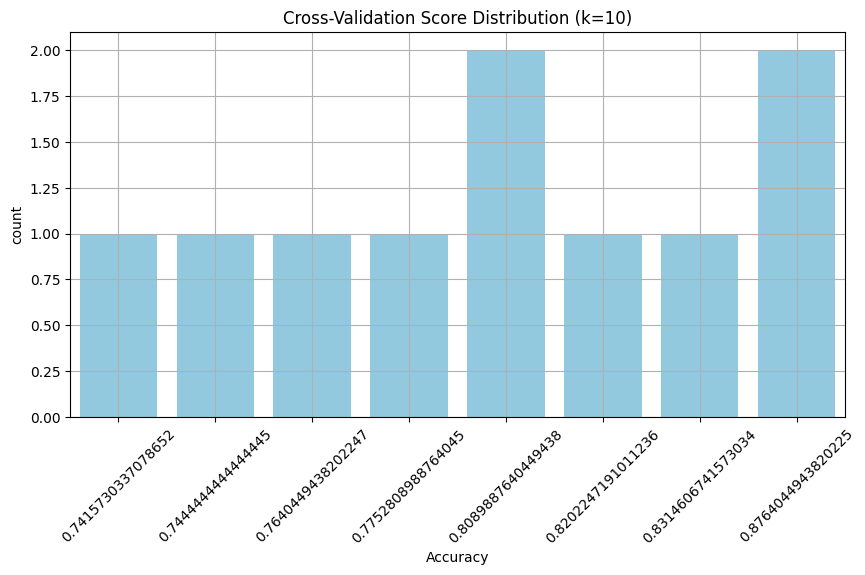

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 5))
sns.countplot(x=cv_scores, color="skyblue")
plt.title(f'Cross-Validation Score Distribution (k={k})')
plt.xlabel('Accuracy')
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.show()


LAB Task

In [ ]:
data=pd.read_csv('heart_2020_cleaned.csv')
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
data.nunique(axis=0)

,0
HeartDisease,2
BMI,3604
Smoking,2
AlcoholDrinking,2
Stroke,2
PhysicalHealth,31
MentalHealth,31
DiffWalking,2
Sex,2
AgeCategory,13


In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.metrics import confusion_matrix
label_encoder=LabelEncoder()

age_pipeline=Pipeline(steps=[('age_encoder',OrdinalEncoder()),
                             ('scaled_age',MinMaxScaler())])

genhealth_pipeline=Pipeline(steps=[('health_encoder',OrdinalEncoder()),
                                   ('scaled_health',MinMaxScaler())])


preprocessing=ColumnTransformer(transformers=[('drop','drop',['Race','Asthma','SkinCancer']),
                                             ('scaled_features',MinMaxScaler(),['BMI','PhysicalHealth','MentalHealth','SleepTime']),
                                             ('ohe',OneHotEncoder(),['Sex','Smoking','AlcoholDrinking','Stroke','DiffWalking','Diabetic','PhysicalActivity','KidneyDisease']),
                                              ('age_encdoer',age_pipeline,['AgeCategory']),
                                              ('health_encoder',genhealth_pipeline,['GenHealth'])
                                            ],remainder='passthrough')



In [ ]:
pipeline=Pipeline(steps=[('preprocessing',preprocessing),
                         ('model',KNeighborsClassifier(n_neighbors=5))])

X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

y=label_encoder.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)

print(f"Classification_report:{classification_report(y_pred,y_test)}")
print(f"Confusion_matrix:{confusion_matrix(y_pred,y_test)}")

Classification_report:              precision    recall  f1-score   support

           0       0.98      0.92      0.95     61878
           1       0.14      0.38      0.21      2081

    accuracy                           0.90     63959
   macro avg       0.56      0.65      0.58     63959
weighted avg       0.95      0.90      0.93     63959

Confusion_matrix:[[57080  4798]
 [ 1287   794]]


In [ ]:
conf_matrix=confusion_matrix(y_pred,y_test,labels=[0,1])
print("confusion matrix:",conf_matrix)

confusion matrix: [[57080  4798]
 [ 1287   794]]


In [ ]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
No,292422
Yes,27373


k fold cross validation

In [ ]:
k=10
cv_scores=cross_val_score(pipeline,X,y,cv=k)  #cv_scores hold list of accuracy scores
print(f"Cross Validation accuracy:{cv_scores}")
print(f"Cross Validation mean accuracy:{cv_scores.mean():.2f}")


Cross Validation accuracy:[0.90478424 0.90168856 0.90537836 0.9058474  0.90594121 0.90556303
 0.90578192 0.90546921 0.90797086 0.90596954]
Cross Validation mean accuracy:0.91


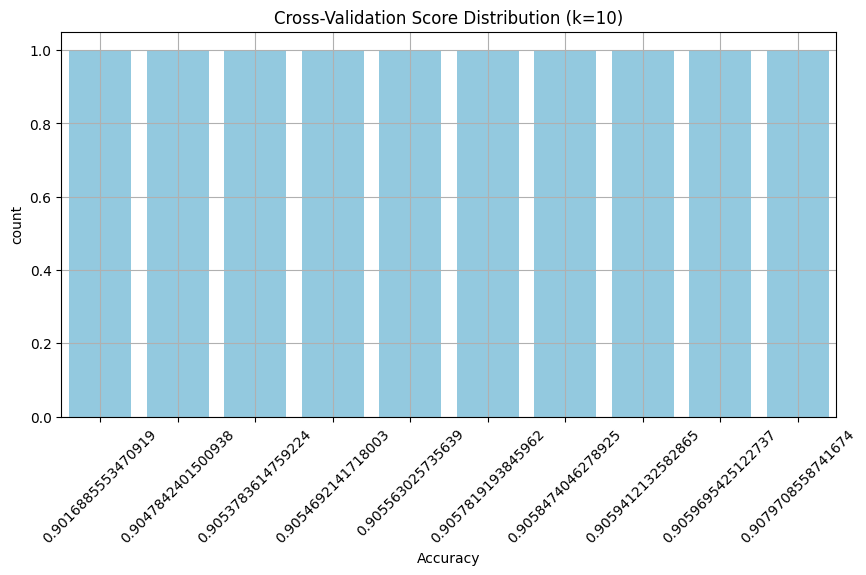

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x=cv_scores, color="skyblue")
plt.title(f'Cross-Validation Score Distribution (k={k})')
plt.xlabel('Accuracy')
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.show()


Undersampling the majority class

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler =RandomUnderSampler(sampling_strategy='majority')

X_train_res, y_train_res = under_sampler.fit_resample(X_train, y_train)
pipeline.fit(X_train_res,y_train_res)
y_pred=pipeline.predict(X_test)

print(f"Classification_report:{classification_report(y_pred,y_test)}")
print(f"Confusion_matrix:{confusion_matrix(y_pred,y_test)}")

Classification_report:              precision    recall  f1-score   support

           0       0.71      0.97      0.82     42997
           1       0.75      0.20      0.31     20962

    accuracy                           0.72     63959
   macro avg       0.73      0.58      0.57     63959
weighted avg       0.72      0.72      0.65     63959

Confusion_matrix:[[41573  1424]
 [16794  4168]]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler =RandomUnderSampler(sampling_strategy='majority')

X_train_res, y_train_res = under_sampler.fit_resample(X_train, y_train)
pipeline.fit(X_train_res,y_train_res)
y_pred=pipeline.predict(X_test)

print(f"Classification_report:{classification_report(y_pred,y_test)}")
print(f"Confusion_matrix:{confusion_matrix(y_pred,y_test)}")

Classification_report:              precision    recall  f1-score   support

           0       0.71      0.97      0.82     43014
           1       0.74      0.20      0.31     20945

    accuracy                           0.71     63959
   macro avg       0.73      0.58      0.57     63959
weighted avg       0.72      0.71      0.65     63959

Confusion_matrix:[[41565  1449]
 [16802  4143]]


In [ ]:
k=10

pipeline=Pipeline(steps=[('preprocessing',preprocessing),('under_sampler',under_sampler),
                         ('model',KNeighborsClassifier(n_neighbors=5))])
cv_scores=cross_val_score(pipeline,X,y,cv=k)  #cv_scores hold list of accuracy scores
print(f"Cross Validation accuracy:{cv_scores}")
print(f"Cross Validation mean accuracy:{cv_scores.mean():.2f}")


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 386, in _fit
    self._validate_steps()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 256, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomUnderSampler(sampling_strategy='majority')' (type <class 'imblearn.under_sampling._prototype_selection._random_under_sampler.RandomUnderSampler'>) doesn't
